# BTC - Facebook Prophet

### Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import _pickle as pickle

from fbprophet import Prophet as proph

### Loading in the Data

In [3]:
with open("df_indicators.pkl",'rb') as fp:
    df = pickle.load(fp)

### Shifting the Data
Done so that the technical indicators would be seen in the "past"

In [4]:
df = df[['Close']].join(df[df.columns[1:]].shift(-1)).dropna()
df

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,457.334015,-2.454020e+07,-1.342640e+07,-0.441847,-1.134291e+09,-3212.366691,-3212.366691,-2.109752e+07,1000.000000,0.000000,...,50.000000,20.584704,25.884066,-79.415296,0.000000,424.440002,0.000000,-7.192558,-7.464335,-7.192558
2014-09-18,424.440002,-4.448391e+07,-5.134610e+07,-0.475969,-1.132834e+09,-3288.687640,-3250.527166,-5.128636e+06,1000.000000,0.000000,...,50.000000,12.271320,21.346484,-87.728680,0.000000,394.795990,0.000000,-6.984264,-7.240151,-13.674475
2014-09-19,394.795990,-3.937687e+07,-1.448250e+07,-0.302148,-8.967045e+08,36.798834,-2154.751832,-1.331094e+06,1035.734917,0.000000,...,50.000000,29.138447,20.664824,-70.861553,0.000000,408.903992,0.000000,3.573492,3.511124,-10.589639
2014-09-20,408.903992,-5.037763e+07,-4.106260e+07,-0.321074,-8.068905e+08,-274.120355,-1684.593963,6.618911e+05,1010.195200,0.000000,...,50.000000,17.083524,19.497764,-82.916476,0.000000,398.821014,0.000000,-2.465855,-2.496766,-12.794369
2014-09-21,398.821014,-4.974146e+07,-1.693500e+07,-0.274768,-6.801392e+08,-31.656617,-1354.006494,-4.539104e+05,1018.632454,0.000000,...,50.000000,21.065966,22.429312,-78.934034,-8.296951,402.152008,0.000000,0.835210,0.831742,-12.066019
2014-09-22,402.152008,-1.610777e+07,2.816450e+07,-0.071232,-3.662477e+08,1695.136068,-845.816067,3.973973e+06,1018.632454,0.000000,...,50.000000,61.283773,33.144421,-38.716227,-11.527058,435.790985,0.000000,8.364742,8.033259,-4.710568
2014-09-23,435.790985,-3.825869e+07,-2.463200e+06,-0.149007,-3.689952e+08,476.627823,-656.895511,2.887904e+06,989.213520,0.000000,...,50.000000,46.236311,42.862017,-53.763689,-8.264314,423.204987,0.000000,-2.888081,-2.930607,-7.462604
2014-09-24,423.204987,-5.703557e+07,-2.927760e+07,-0.201132,-3.608356e+08,-635.564367,-654.229118,-1.621496e+06,962.026873,0.000000,...,50.000000,32.330638,46.616907,-67.669362,-5.888602,411.574005,0.000000,-2.748309,-2.786782,-10.005818
2014-09-25,411.574005,-6.580018e+07,-5.073840e+07,-0.215715,-3.312053e+08,-627.501292,-651.259360,-1.109716e+06,945.316521,25.504999,...,50.000000,23.783477,34.116809,-76.216523,-3.736702,404.424988,0.000000,-1.736994,-1.752257,-11.569012


### Formatting the data for Facebook Prophet

In [5]:
ts = df[["Close"]]

In [6]:
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

ts.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


#### Plotting

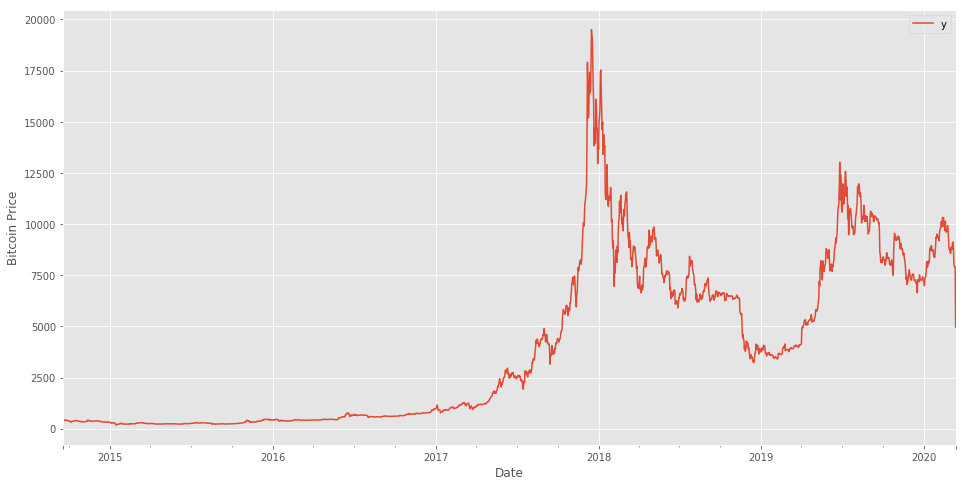

In [7]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_ylabel('Bitcoin Price')
ax.set_xlabel('Date')

plt.show()

### Modeling

In [5]:
# Fitting and training
mod = proph(interval_width=0.95)
mod.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Creating future dates to forecast

In [6]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
1024,2019-10-22
1025,2019-10-23
1026,2019-10-24
1027,2019-10-25
1028,2019-10-26


#### Forecasting future values

In [7]:
# Making predictions
forecast = mod.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1024,2019-10-22,13426.529950,11230.521604,15556.067398,13073.006208,13765.663926,-56.780055,-56.780055,-56.780055,-9.705904,-9.705904,-9.705904,-47.074151,-47.074151,-47.074151,0.0,0.0,0.0,13369.749895
1025,2019-10-23,13464.816732,11228.470609,15557.780822,13092.609796,13822.528647,-19.827599,-19.827599,-19.827599,-15.840328,-15.840328,-15.840328,-3.987271,-3.987271,-3.987271,0.0,0.0,0.0,13444.989133
1026,2019-10-24,13503.103514,11350.928631,15837.016573,13111.056576,13876.456549,-5.488892,-5.488892,-5.488892,-40.385119,-40.385119,-40.385119,34.896228,34.896228,34.896228,0.0,0.0,0.0,13497.614622
1027,2019-10-25,13541.390296,11629.524726,15669.706178,13113.968539,13942.419261,77.735934,77.735934,77.735934,8.777916,8.777916,8.777916,68.958018,68.958018,68.958018,0.0,0.0,0.0,13619.126230
1028,2019-10-26,13579.677078,11611.517797,15950.098957,13125.231789,14002.384971,129.802920,129.802920,129.802920,32.185743,32.185743,32.185743,97.617178,97.617178,97.617178,0.0,0.0,0.0,13709.479998


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

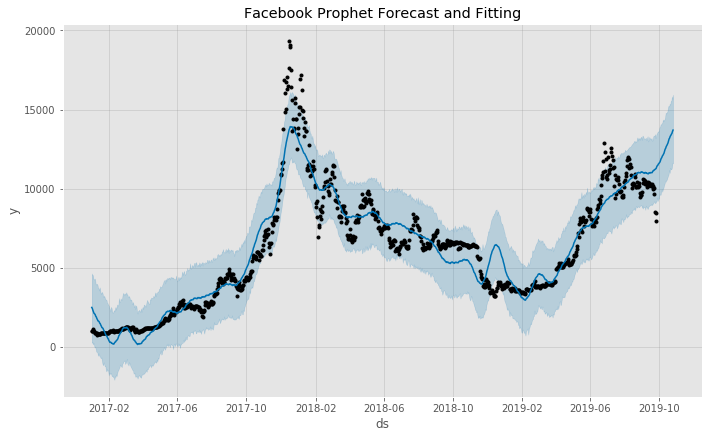

In [17]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.show()

#### Graph above zoomed in

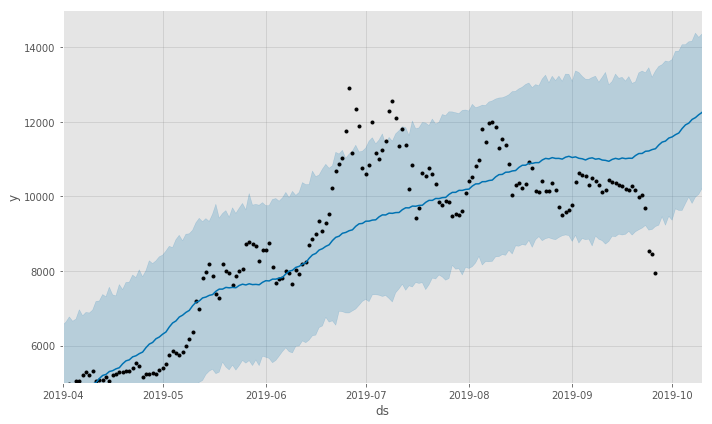

In [13]:
mod.plot(forecast, uncertainty=True)

plt.xlim(['2019-04-01', '2019-10-10'])
plt.ylim([5000, 15000])
plt.show()

#### Plotted components of the forecasts

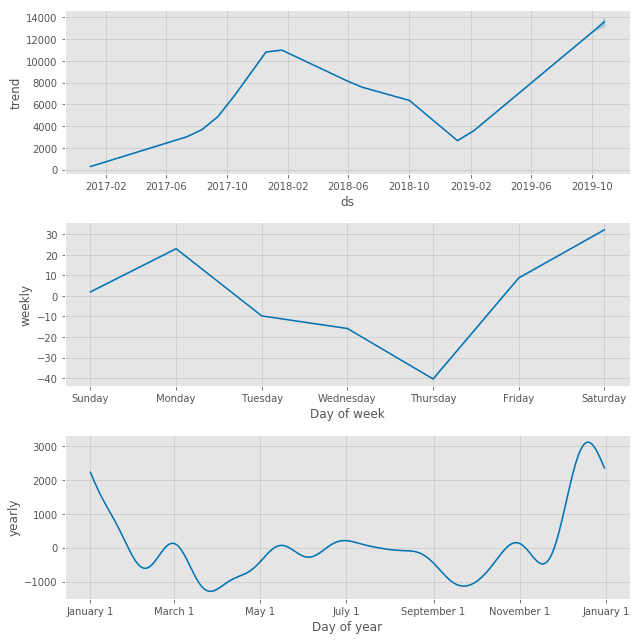

In [10]:
mod.plot_components(forecast)
plt.show()